In [29]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [30]:
# %% [markdown]
# ==========================================================
#   特征工程（EDA）：查看特征与 future_6h_consumption 的关系
# ==========================================================


# 设置显示
pd.set_option("display.max_columns", 200)

# ===== 1. 数据加载 =====
Root_PATH = r"D:\OneDrive - The University of Western Ontario\03 课程\ECE 9611\Project\code"
INPUT_PATH = Root_PATH + r"\6hour_interval\smart_meter_6h_with_future6h_label.csv"

df = pd.read_csv(INPUT_PATH)
df.columns = df.columns.str.strip()

print("数据形状:", df.shape)
df.head()


数据形状: (463399, 48)


,household_ID,DATE,TIME,TOTAL_IMPORT (kWh),w1_hh_member_count,w1_hh_avg_age,w1_hh_num_children,w1_hh_num_seniors,w1_hh_avg_hours_home,w1_hh_share_went_out_for_work,w1_num_fans,w1_fan_hours_day,w1_fan_hours_night,w1_num_lights,w1_light_total_wattage,w1_light_hours_day,w1_light_hours_night,w1_num_rooms,w1_total_windows,w1_total_doors_ext,w1_total_room_bulbs,w1_total_room_fans,w1_total_room_acs,w1_num_bedrooms,own_the_house_or_living_on_rent,built_year_of_the_house,type_of_house,floor_area,is_there_business_carried_out_in_the_household,socio_economic_class,total_monthly_expenditure_of_last_month,method_of_receiving_water,water_heating_method_for_bathing,boil_water_before_drinking,no_of_times_food_cooked_last_week,gas_used_for_cooking,electricity_from_national_grid_used_for_cooking,electricity_generated_using_solar_energy_used_for_cooking,firewood_used_for_cooking,kerosene_used_for_cooking,sawdust_or_paddy_husk_used_for_cooking,biogas_used_for_cooking,coconut_shells_or_charcoal_used_for_cooking,timestamp,next_timestamp,next_import,delta_hours_next,future_6h_consumption
0,ID0220,2023-01-01,1:11:16,2203.1041,2,66.5,0,2,165.0,0.0,3.0,5.0,37.0,15.0,146.0,0.33,43.58,12,19.0,4.0,15.0,3.0,0.0,3,"Yes, I or a household member owns it.",1990-1999,Single House - Double Floor,1500.0,No,SEC C,50000.0,Tap Water (National Water Supply and drainage ...,"None, we do not use hot water for bathing or b...",No,8 - 14 times,Yes,No,No,No,No,No,No,No,2023-01-01 01:11:16,2023-01-01 06:29:34,2203.709,5.305000,0.6049
1,ID0220,2023-01-02,21:22:00,2209.0300,2,66.5,0,2,165.0,0.0,3.0,5.0,37.0,15.0,146.0,0.33,43.58,12,19.0,4.0,15.0,3.0,0.0,3,"Yes, I or a household member owns it.",1990-1999,Single House - Double Floor,1500.0,No,SEC C,50000.0,Tap Water (National Water Supply and drainage ...,"None, we do not use hot water for bathing or b...",No,8 - 14 times,Yes,No,No,No,No,No,No,No,2023-01-02 21:22:00,2023-01-03 01:42:52,2209.764,4.347778,0.7340
2,ID0220,2023-01-03,1:42:52,2209.7640,2,66.5,0,2,165.0,0.0,3.0,5.0,37.0,15.0,146.0,0.33,43.58,12,19.0,4.0,15.0,3.0,0.0,3,"Yes, I or a household member owns it.",1990-1999,Single House - Double Floor,1500.0,No,SEC C,50000.0,Tap Water (National Water Supply and drainage ...,"None, we do not use hot water for bathing or b...",No,8 - 14 times,Yes,No,No,No,No,No,No,No,2023-01-03 01:42:52,2023-01-03 06:40:57,2210.320,4.968056,0.5560
3,ID0220,2023-01-03,21:17:42,2212.8880,2,66.5,0,2,165.0,0.0,3.0,5.0,37.0,15.0,146.0,0.33,43.58,12,19.0,4.0,15.0,3.0,0.0,3,"Yes, I or a household member owns it.",1990-1999,Single House - Double Floor,1500.0,No,SEC C,50000.0,Tap Water (National Water Supply and drainage ...,"None, we do not use hot water for bathing or b...",No,8 - 14 times,Yes,No,No,No,No,No,No,No,2023-01-03 21:17:42,2023-01-04 01:45:27,2213.847,4.462500,0.9590
4,ID0220,2023-01-04,1:45:27,2213.8470,2,66.5,0,2,165.0,0.0,3.0,5.0,37.0,15.0,146.0,0.33,43.58,12,19.0,4.0,15.0,3.0,0.0,3,"Yes, I or a household member owns it.",1990-1999,Single House - Double Floor,1500.0,No,SEC C,50000.0,Tap Water (National Water Supply and drainage ...,"None, we do not use hot water for bathing or b...",No,8 - 14 times,Yes,No,No,No,No,No,No,No,2023-01-04 01:45:27,2023-01-04 06:40:59,2214.752,4.925556,0.9050


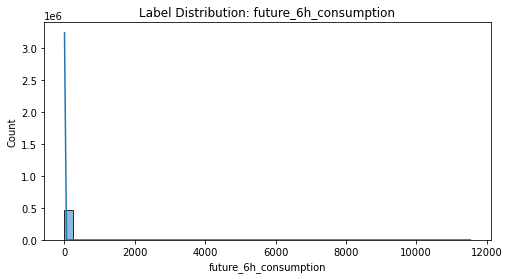

标签统计:
count    463399.000000
mean          5.715114
std         177.386959
min           0.000900
25%           0.499000
50%           0.836000
75%           1.336000
max       11535.258900
Name: future_6h_consumption, dtype: float64


In [32]:
# 标签分布（未来 6 小时用电量）
plt.figure(figsize=(8,4))
sns.histplot(df["future_6h_consumption"], bins=50, kde=True)
plt.title("Label Distribution: future_6h_consumption")
plt.show()

print("标签统计:")
print(df["future_6h_consumption"].describe())


after removing negative future_6h_consumption, shape: (462713, 48)


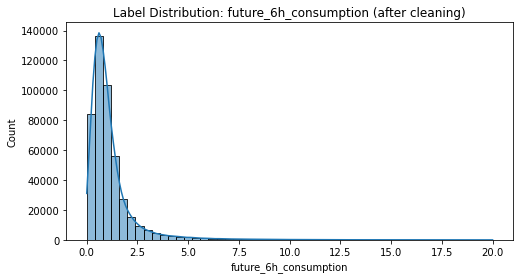

标签统计:
count    462713.000000
mean          1.163709
std           1.334644
min           0.000900
25%           0.498000
50%           0.835000
75%           1.333000
max          19.998000
Name: future_6h_consumption, dtype: float64


In [33]:
# 删除明显label不合理的行
df_6h_clean = df[(df["future_6h_consumption"] >= 0) & (df["future_6h_consumption"] <= 20)].reset_index(drop=True)
print("after removing negative future_6h_consumption, shape:", df_6h_clean.shape)
plt.figure(figsize=(8,4))
sns.histplot(df_6h_clean["future_6h_consumption"], bins=50, kde=True)
plt.title("Label Distribution: future_6h_consumption (after cleaning)")
plt.show()
print("标签统计:")
print(df_6h_clean["future_6h_consumption"].describe())

In [34]:
# 数字列
num_cols = df_6h_clean.select_dtypes(include=[np.number]).columns.tolist()

# 去掉标签本身
num_cols = [c for c in num_cols if c != "future_6h_consumption" and c != "TOTAL_IMPORT (kWh)" and c !="next_import" and c !="delta_hours_next"]

print("数值特征数量:", len(num_cols), "，包括：", num_cols)

# 计算 Pearson 相关性（线性关系）
corr = df_6h_clean[num_cols + ["future_6h_consumption"]].corr()["future_6h_consumption"].sort_values(ascending=False)
corr


数值特征数量: 22 ，包括： ['w1_hh_member_count', 'w1_hh_avg_age', 'w1_hh_num_children', 'w1_hh_num_seniors', 'w1_hh_avg_hours_home', 'w1_hh_share_went_out_for_work', 'w1_num_fans', 'w1_fan_hours_day', 'w1_fan_hours_night', 'w1_num_lights', 'w1_light_total_wattage', 'w1_light_hours_day', 'w1_light_hours_night', 'w1_num_rooms', 'w1_total_windows', 'w1_total_doors_ext', 'w1_total_room_bulbs', 'w1_total_room_fans', 'w1_total_room_acs', 'w1_num_bedrooms', 'floor_area', 'total_monthly_expenditure_of_last_month']


future_6h_consumption                      1.000000
w1_total_room_acs                          0.608380
w1_total_room_bulbs                        0.410041
w1_num_lights                              0.409559
w1_num_rooms                               0.395912
w1_total_room_fans                         0.359526
w1_num_bedrooms                            0.356073
w1_num_fans                                0.353074
floor_area                                 0.320613
w1_total_windows                           0.296289
total_monthly_expenditure_of_last_month    0.295596
w1_total_doors_ext                         0.290078
w1_light_hours_night                       0.222405
w1_hh_member_count                         0.160504
w1_light_total_wattage                     0.146943
w1_fan_hours_night                         0.109773
w1_fan_hours_day                           0.105321
w1_light_hours_day                         0.081215
w1_hh_num_children                         0.057408
w1_hh_num_se

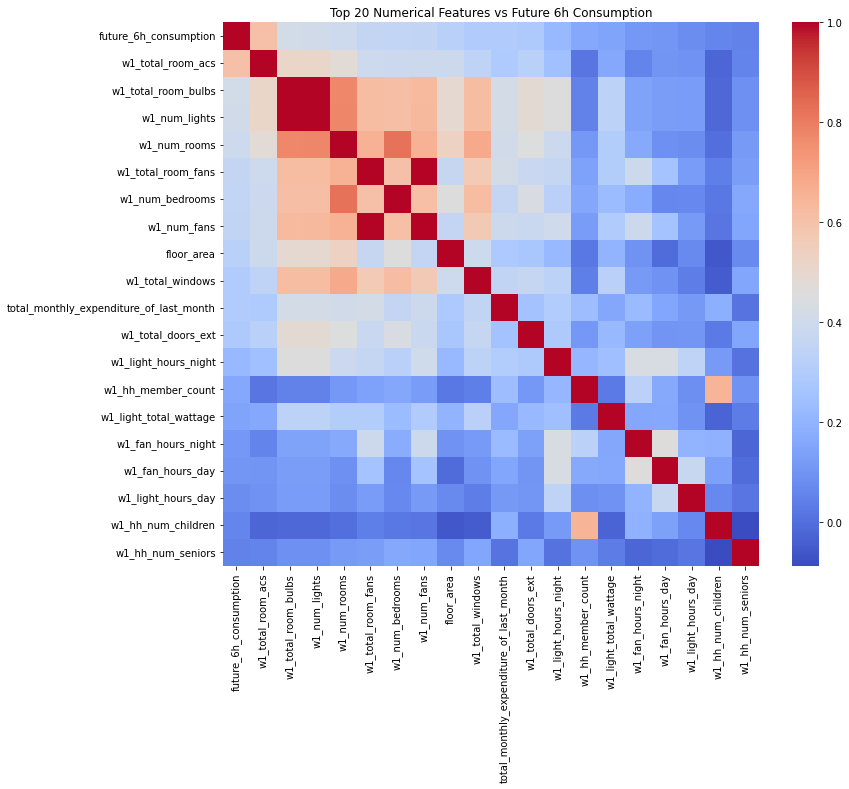

In [35]:
top_corr_cols = corr.index[:20].tolist()  # 前 20 个相关性大的列
corr_matrix = df_6h_clean[top_corr_cols].corr()

plt.figure(figsize=(12,10))
sns.heatmap(corr_matrix, annot=False, cmap="coolwarm")
plt.title("Top 20 Numerical Features vs Future 6h Consumption")
plt.show()


类别特征数量: 17
['own_the_house_or_living_on_rent', 'built_year_of_the_house', 'type_of_house', 'is_there_business_carried_out_in_the_household', 'socio_economic_class', 'method_of_receiving_water', 'water_heating_method_for_bathing', 'boil_water_before_drinking', 'no_of_times_food_cooked_last_week', 'gas_used_for_cooking', 'electricity_from_national_grid_used_for_cooking', 'electricity_generated_using_solar_energy_used_for_cooking', 'firewood_used_for_cooking', 'kerosene_used_for_cooking', 'sawdust_or_paddy_husk_used_for_cooking', 'biogas_used_for_cooking', 'coconut_shells_or_charcoal_used_for_cooking']


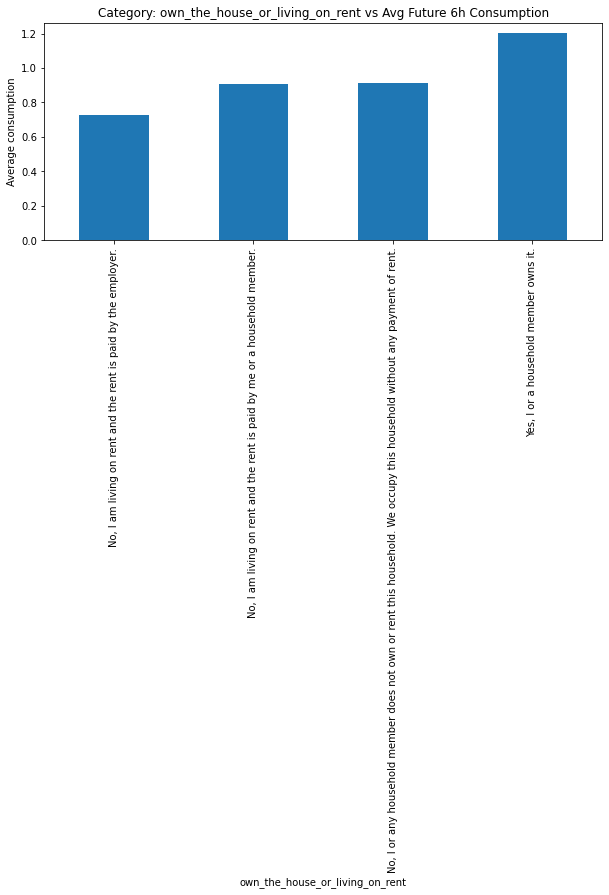

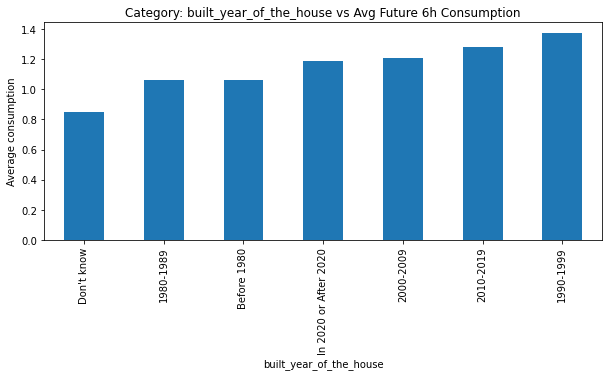

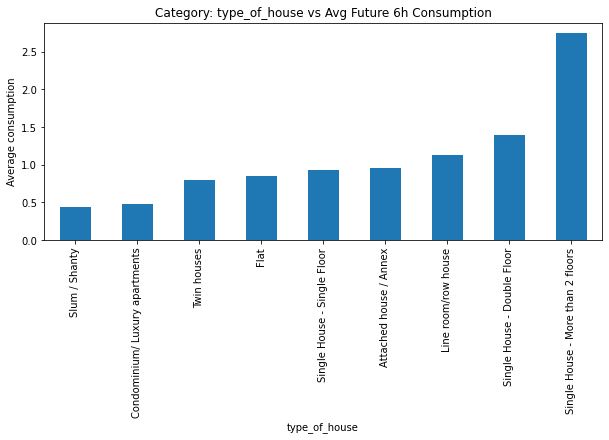

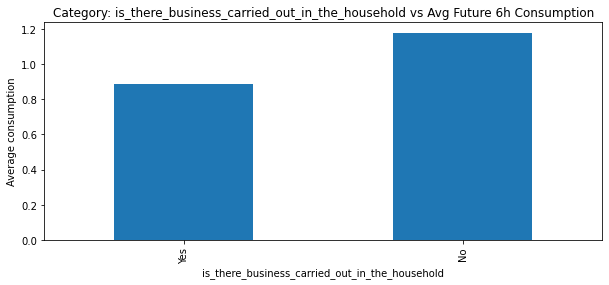

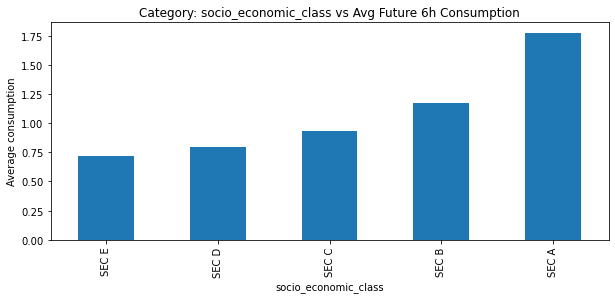

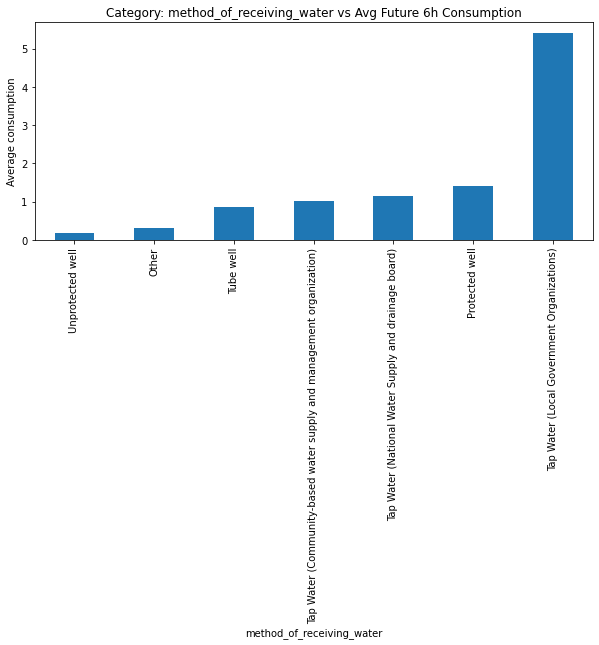

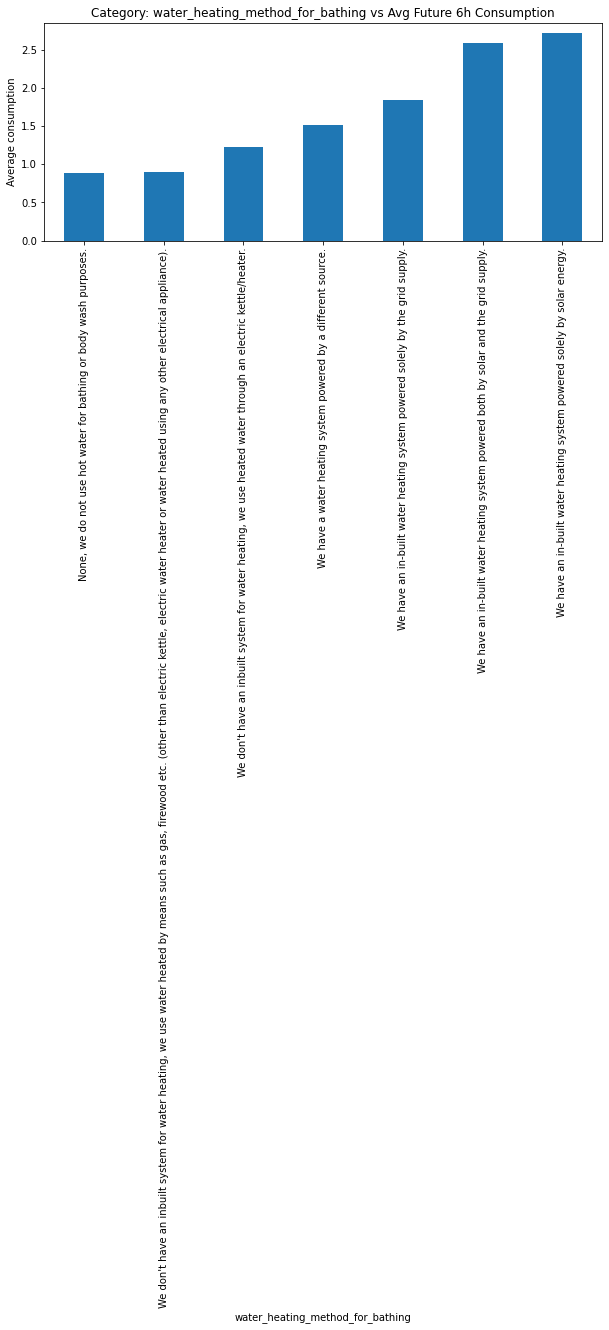

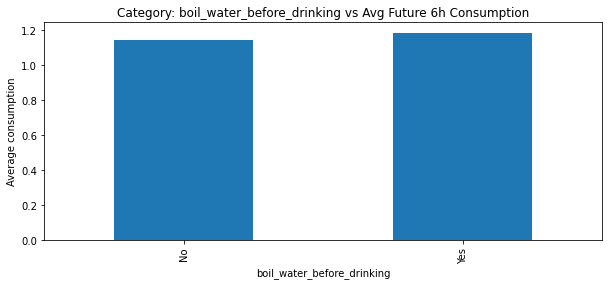

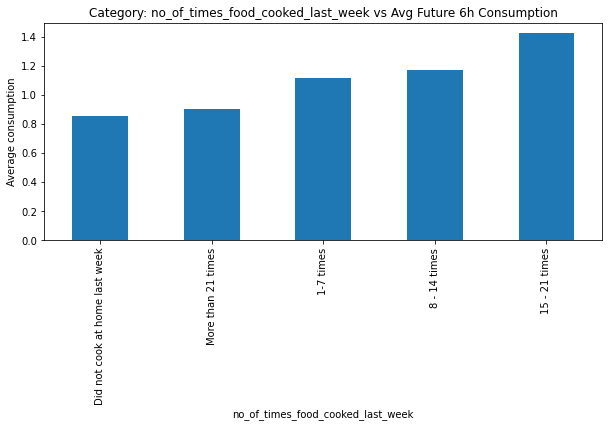

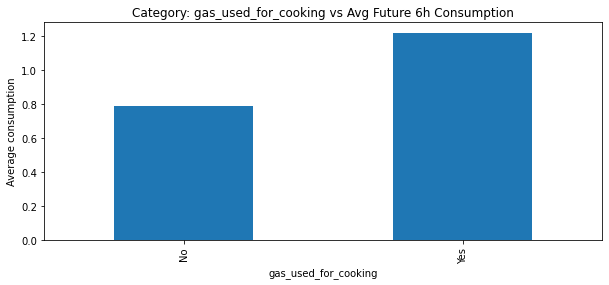

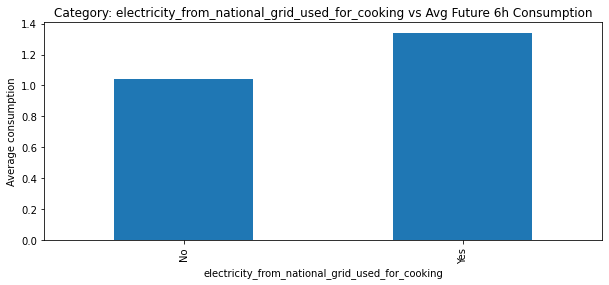

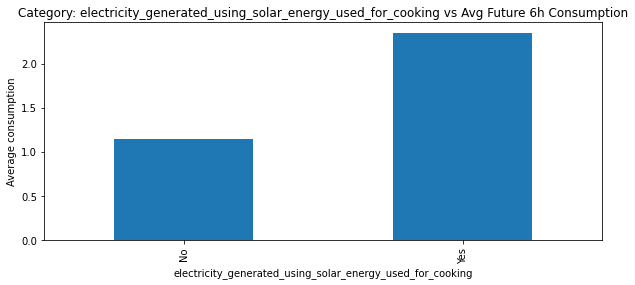

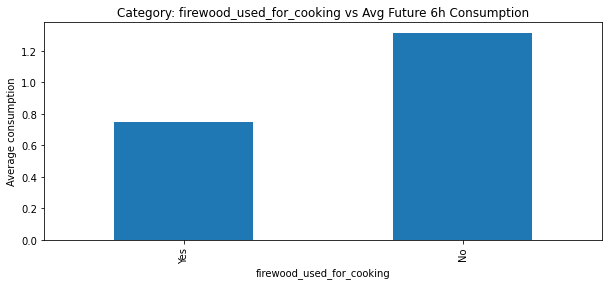

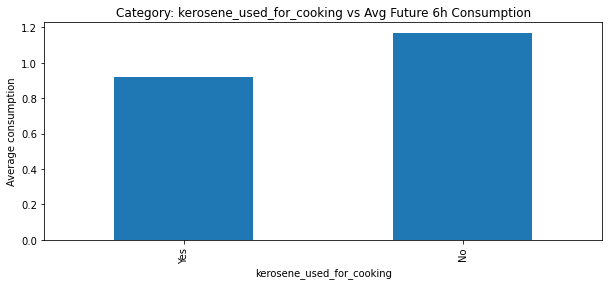

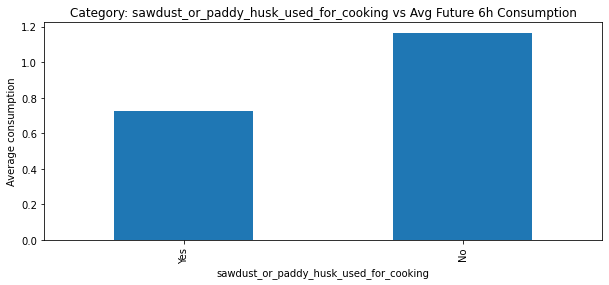

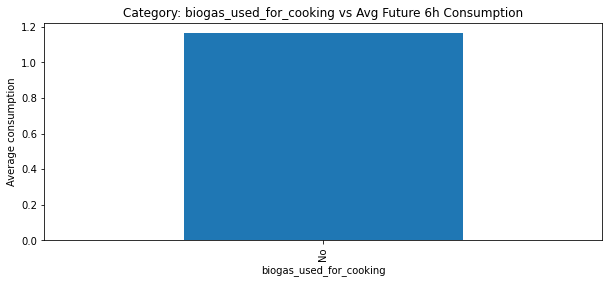

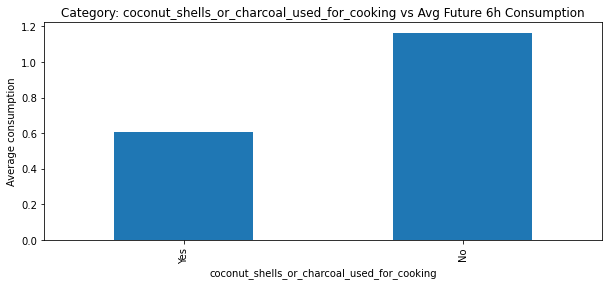

In [36]:
# 找出非数值列
cat_cols = df_6h_clean.select_dtypes(exclude=[np.number, "datetime64"]).columns.tolist()

# 避免 household_ID, DATE, TIME 等无意义列
ignore_cols = ["household_ID", "DATE", "TIME", "next_timestamp", 'timestamp']
cat_cols = [c for c in cat_cols if c not in ignore_cols]

print("类别特征数量:", len(cat_cols))
print(cat_cols)

# 查看类别特征的不同取值与平均未来用电量
for col in cat_cols: 
    plt.figure(figsize=(10,4))
    tmp = df_6h_clean.groupby(col)["future_6h_consumption"].mean().sort_values()
    tmp.plot(kind="bar")
    plt.title(f"Category: {col} vs Avg Future 6h Consumption")
    plt.ylabel("Average consumption")
    plt.show()


In [37]:
# 把cat_cols中的特征编码为0，1，2，3，...等整数
from sklearn.preprocessing import LabelEncoder
for col in cat_cols:
    le = LabelEncoder()
    df_6h_clean[col] = le.fit_transform(df_6h_clean[col])
df_6h_clean.head()

,household_ID,DATE,TIME,TOTAL_IMPORT (kWh),w1_hh_member_count,w1_hh_avg_age,w1_hh_num_children,w1_hh_num_seniors,w1_hh_avg_hours_home,w1_hh_share_went_out_for_work,w1_num_fans,w1_fan_hours_day,w1_fan_hours_night,w1_num_lights,w1_light_total_wattage,w1_light_hours_day,w1_light_hours_night,w1_num_rooms,w1_total_windows,w1_total_doors_ext,w1_total_room_bulbs,w1_total_room_fans,w1_total_room_acs,w1_num_bedrooms,own_the_house_or_living_on_rent,built_year_of_the_house,type_of_house,floor_area,is_there_business_carried_out_in_the_household,socio_economic_class,total_monthly_expenditure_of_last_month,method_of_receiving_water,water_heating_method_for_bathing,boil_water_before_drinking,no_of_times_food_cooked_last_week,gas_used_for_cooking,electricity_from_national_grid_used_for_cooking,electricity_generated_using_solar_energy_used_for_cooking,firewood_used_for_cooking,kerosene_used_for_cooking,sawdust_or_paddy_husk_used_for_cooking,biogas_used_for_cooking,coconut_shells_or_charcoal_used_for_cooking,timestamp,next_timestamp,next_import,delta_hours_next,future_6h_consumption
0,ID0220,2023-01-01,1:11:16,2203.1041,2,66.5,0,2,165.0,0.0,3.0,5.0,37.0,15.0,146.0,0.33,43.58,12,19.0,4.0,15.0,3.0,0.0,3,3,1,4,1500.0,0,2,50000.0,4,0,0,2,1,0,0,0,0,0,0,0,2023-01-01 01:11:16,2023-01-01 06:29:34,2203.709,5.305000,0.6049
1,ID0220,2023-01-02,21:22:00,2209.0300,2,66.5,0,2,165.0,0.0,3.0,5.0,37.0,15.0,146.0,0.33,43.58,12,19.0,4.0,15.0,3.0,0.0,3,3,1,4,1500.0,0,2,50000.0,4,0,0,2,1,0,0,0,0,0,0,0,2023-01-02 21:22:00,2023-01-03 01:42:52,2209.764,4.347778,0.7340
2,ID0220,2023-01-03,1:42:52,2209.7640,2,66.5,0,2,165.0,0.0,3.0,5.0,37.0,15.0,146.0,0.33,43.58,12,19.0,4.0,15.0,3.0,0.0,3,3,1,4,1500.0,0,2,50000.0,4,0,0,2,1,0,0,0,0,0,0,0,2023-01-03 01:42:52,2023-01-03 06:40:57,2210.320,4.968056,0.5560
3,ID0220,2023-01-03,21:17:42,2212.8880,2,66.5,0,2,165.0,0.0,3.0,5.0,37.0,15.0,146.0,0.33,43.58,12,19.0,4.0,15.0,3.0,0.0,3,3,1,4,1500.0,0,2,50000.0,4,0,0,2,1,0,0,0,0,0,0,0,2023-01-03 21:17:42,2023-01-04 01:45:27,2213.847,4.462500,0.9590
4,ID0220,2023-01-04,1:45:27,2213.8470,2,66.5,0,2,165.0,0.0,3.0,5.0,37.0,15.0,146.0,0.33,43.58,12,19.0,4.0,15.0,3.0,0.0,3,3,1,4,1500.0,0,2,50000.0,4,0,0,2,1,0,0,0,0,0,0,0,2023-01-04 01:45:27,2023-01-04 06:40:59,2214.752,4.925556,0.9050


In [40]:
# ===== 时间特征 =====
df_6h_clean["hour"] = pd.to_datetime(df_6h_clean["timestamp"]).dt.hour
df_6h_clean["dayofweek"] = pd.to_datetime(df_6h_clean["timestamp"]).dt.dayofweek
df_6h_clean["month"] = pd.to_datetime(df_6h_clean["timestamp"]).dt.month

# ===== backward 当前最新一次读数与上一次读数的之间的平均每小时用电量
df_6h_clean["prev_import"] = df_6h_clean.groupby("household_ID")["TOTAL_IMPORT (kWh)"].shift(1)
prev_timestamp = df_6h_clean.groupby("household_ID")["timestamp"].shift(1)
delta_time = (
    pd.to_datetime(df_6h_clean["timestamp"]) - pd.to_datetime(prev_timestamp)
).dt.total_seconds() / 3600.0
df_6h_clean["backward_6h_consumption"] = (df_6h_clean["TOTAL_IMPORT (kWh)"] - df_6h_clean["prev_import"]) / delta_time
df_6h_clean.loc[df_6h_clean["backward_6h_consumption"] <= 0, "backward_6h_consumption"] = np.nan

# ===== 每人均用电潜力 =====
if "w1_hh_member_count" in df_6h_clean.columns:
    df_6h_clean["consumption_per_member"] = df_6h_clean["backward_6h_consumption"] / df_6h_clean["w1_hh_member_count"]
# ===== 房屋面积 × 家电数量 =====
if "floor_area" in df_6h_clean.columns and "w1_num_fans" in df_6h_clean.columns:
    df_6h_clean["fan_density"] = df_6h_clean["w1_num_fans"] / df_6h_clean["floor_area"].replace(0, np.nan)

print("构造复合特征完成")


构造复合特征完成


In [41]:
df_6h_clean.head()

,household_ID,DATE,TIME,TOTAL_IMPORT (kWh),w1_hh_member_count,w1_hh_avg_age,w1_hh_num_children,w1_hh_num_seniors,w1_hh_avg_hours_home,w1_hh_share_went_out_for_work,w1_num_fans,w1_fan_hours_day,w1_fan_hours_night,w1_num_lights,w1_light_total_wattage,w1_light_hours_day,w1_light_hours_night,w1_num_rooms,w1_total_windows,w1_total_doors_ext,w1_total_room_bulbs,w1_total_room_fans,w1_total_room_acs,w1_num_bedrooms,own_the_house_or_living_on_rent,built_year_of_the_house,type_of_house,floor_area,is_there_business_carried_out_in_the_household,socio_economic_class,total_monthly_expenditure_of_last_month,method_of_receiving_water,water_heating_method_for_bathing,boil_water_before_drinking,no_of_times_food_cooked_last_week,gas_used_for_cooking,electricity_from_national_grid_used_for_cooking,electricity_generated_using_solar_energy_used_for_cooking,firewood_used_for_cooking,kerosene_used_for_cooking,sawdust_or_paddy_husk_used_for_cooking,biogas_used_for_cooking,coconut_shells_or_charcoal_used_for_cooking,timestamp,next_timestamp,next_import,delta_hours_next,future_6h_consumption,hour,dayofweek,month,prev_import,backward_6h_consumption,consumption_per_member,fan_density
0,ID0220,2023-01-01,1:11:16,2203.1041,2,66.5,0,2,165.0,0.0,3.0,5.0,37.0,15.0,146.0,0.33,43.58,12,19.0,4.0,15.0,3.0,0.0,3,3,1,4,1500.0,0,2,50000.0,4,0,0,2,1,0,0,0,0,0,0,0,2023-01-01 01:11:16,2023-01-01 06:29:34,2203.709,5.305000,0.6049,1,6,1,NaN,NaN,NaN,0.002
1,ID0220,2023-01-02,21:22:00,2209.0300,2,66.5,0,2,165.0,0.0,3.0,5.0,37.0,15.0,146.0,0.33,43.58,12,19.0,4.0,15.0,3.0,0.0,3,3,1,4,1500.0,0,2,50000.0,4,0,0,2,1,0,0,0,0,0,0,0,2023-01-02 21:22:00,2023-01-03 01:42:52,2209.764,4.347778,0.7340,21,0,1,2203.1041,0.134134,0.067067,0.002
2,ID0220,2023-01-03,1:42:52,2209.7640,2,66.5,0,2,165.0,0.0,3.0,5.0,37.0,15.0,146.0,0.33,43.58,12,19.0,4.0,15.0,3.0,0.0,3,3,1,4,1500.0,0,2,50000.0,4,0,0,2,1,0,0,0,0,0,0,0,2023-01-03 01:42:52,2023-01-03 06:40:57,2210.320,4.968056,0.5560,1,1,1,2209.0300,0.168822,0.084411,0.002
3,ID0220,2023-01-03,21:17:42,2212.8880,2,66.5,0,2,165.0,0.0,3.0,5.0,37.0,15.0,146.0,0.33,43.58,12,19.0,4.0,15.0,3.0,0.0,3,3,1,4,1500.0,0,2,50000.0,4,0,0,2,1,0,0,0,0,0,0,0,2023-01-03 21:17:42,2023-01-04 01:45:27,2213.847,4.462500,0.9590,21,1,1,2209.7640,0.159546,0.079773,0.002
4,ID0220,2023-01-04,1:45:27,2213.8470,2,66.5,0,2,165.0,0.0,3.0,5.0,37.0,15.0,146.0,0.33,43.58,12,19.0,4.0,15.0,3.0,0.0,3,3,1,4,1500.0,0,2,50000.0,4,0,0,2,1,0,0,0,0,0,0,0,2023-01-04 01:45:27,2023-01-04 06:40:59,2214.752,4.925556,0.9050,1,2,1,2212.8880,0.214902,0.107451,0.002


In [42]:
new_cols = ["hour", "dayofweek", "month",
            "backward_6h_consumption",
            "consumption_per_member",
            "fan_density"]

tmp_corr = df_6h_clean[new_cols + ["future_6h_consumption"]].corr()["future_6h_consumption"]
tmp_corr.sort_values(ascending=False)


future_6h_consumption      1.000000
hour                       0.168210
backward_6h_consumption    0.129860
consumption_per_member     0.111033
month                      0.006408
dayofweek                 -0.008201
fan_density               -0.061345
Name: future_6h_consumption, dtype: float64

In [43]:
OUTPUT_FE_PATH =  r"\6hour_interval\smart_meter_6h_feature_engineered.csv"
df_6h_clean.to_csv(Root_PATH + OUTPUT_FE_PATH, index=False)
print("已保存特征工程后的数据:", OUTPUT_FE_PATH)


已保存特征工程后的数据: \6hour_interval\smart_meter_6h_feature_engineered.csv
